# Figure 9: Relative improvement of 4S over PCA

In [2]:
from pathlib import Path
import pandas as pd

import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fours.utils.data_handling import read_fours_root_dir

## Load the contrast curves

In [3]:
root_dir = Path(read_fours_root_dir())
result_file = root_dir / Path("70_results/x1_fake_planet_experiments/contrast_curves/")

Data in the FOURS_ROOT_DIR found. Location: /fast/mbonse/s4


In [4]:
s4_keys = [
    "s4_median_lambda_000100",
    "s4_median_lambda_001000",
    "s4_median_lambda_010000",
    "s4_median_lambda_100000",
    "s4_mean_lambda_000100",
    "s4_mean_lambda_001000",
    "s4_mean_lambda_010000",
    "s4_mean_lambda_100000",
]

In [5]:
pca_results = dict()
s4_results = dict()

for tmp_file in result_file.iterdir():
    if not tmp_file.name.endswith(".pkl"):
        continue
        
    tmp_datset_name = tmp_file.name[:-5]
    
    with open(tmp_file, 'rb') as f:
        tmp_data = pickle.load(f)
        
    # merge all data
    tmp_result_table = pd.concat(tmp_data.values(), keys=tmp_data.keys(), axis=1)
    pca_columns = tmp_result_table.columns.get_level_values(0).difference(s4_keys)
    
    pca_results[tmp_datset_name] = tmp_result_table[pca_columns]
    s4_results[tmp_datset_name] = tmp_result_table[s4_keys]

## Get the best of PCA and 4S

In [6]:
def get_best_off(dataset_name):
    separations_FWHM = pca_results[dataset_name].index.values
    overall_best_pca = pca_results[dataset_name].max(axis=1).values
    overall_best_s4 = s4_results[dataset_name].max(axis=1).values

    return overall_best_s4, overall_best_pca, separations_FWHM

In [7]:
results = []
separations = []
merged = []

for tmp_dataset_name in pca_results.keys():
    overall_best_s4, overall_best_pca, separations_FWHM = get_best_off(tmp_dataset_name)
    
    improvement = overall_best_s4 - overall_best_pca
    tmp_dataframe = pd.DataFrame(improvement, separations_FWHM)
    tmp_dataframe.columns = [tmp_dataset_name]
    merged.append(tmp_dataframe)
merged_improvement = pd.concat(merged, axis=1)
merged_improvement.index = np.round(merged_improvement.index, 2)
merged_improvement.index = merged_improvement.index.astype(str)

In [8]:
merged_improvement

,HD7570_331_1101_C-0092_C,HD115892_143_1101_C-0092_E,HD177724_231_091_C-0654_A,HD169022_140_1101_C-0092_E,HD40136_333_1101_C-0092_C,HD2262_305_199_C-0065_C,HD209952_196_089_C-0149_A,HD22049_303_199_C-0065_C,HD11171_332_1101_C-0092_C,HD38678_331_084_C-0396_A,HD22049_351_096_C-0679_A
1.5,1.336391,0.796561,NaN,NaN,1.417691,0.783961,NaN,1.320061,NaN,NaN,1.309371
2.0,1.141301,0.251640,NaN,0.39776,0.390930,0.208360,NaN,1.549092,0.616931,1.175501,0.778641
2.5,-0.084010,1.199871,NaN,0.24099,0.648501,0.692501,NaN,1.347711,0.830621,0.554311,0.542111
3.0,-0.329760,0.423820,0.38716,-0.09616,0.792411,0.438690,NaN,0.661731,0.519381,0.847631,0.260430
3.5,0.250800,0.360410,0.18092,0.33008,0.243280,0.663721,0.502531,0.172580,-0.294600,-0.171900,-0.302620
4.0,0.538801,-0.026310,0.09600,-0.09250,-0.087920,0.529091,0.397430,0.280940,0.258770,0.779031,0.194870
4.5,0.215240,-0.113590,-0.15100,0.06281,0.143750,0.039140,0.185020,-0.005130,0.265410,0.155840,0.209380
5.0,-0.229370,0.118730,0.24845,-0.19008,0.150750,0.304280,0.190390,0.316750,0.222890,-0.102150,0.222710
6.0,0.269460,-0.144220,-0.22980,-0.09785,0.308480,0.038840,-0.178240,0.076010,0.558931,0.157800,0.056870
7.0,0.096760,0.213870,0.43434,NaN,-0.296800,-0.119620,-0.071400,0.194570,0.121640,0.149900,0.227750


In [9]:
agpm_datasets = [
    "HD7570_331_1101_C-0092_C",
    "HD115892_143_1101_C-0092_E",
    "HD169022_140_1101_C-0092_E",
    "HD40136_333_1101_C-0092_C",
    "HD2262_305_199_C-0065_C",
    "HD22049_303_199_C-0065_C",
    "HD22049_351_096_C-0679_A",
    "HD11171_332_1101_C-0092_C"
]

dither_datasets = [
    "HD177724_231_091_C-0654_A",
    "HD209952_196_089_C-0149_A",
    "HD38678_331_084_C-0396_A"]

## Plots the results

In [10]:
median_results = merged_improvement.T.median(axis=0).values

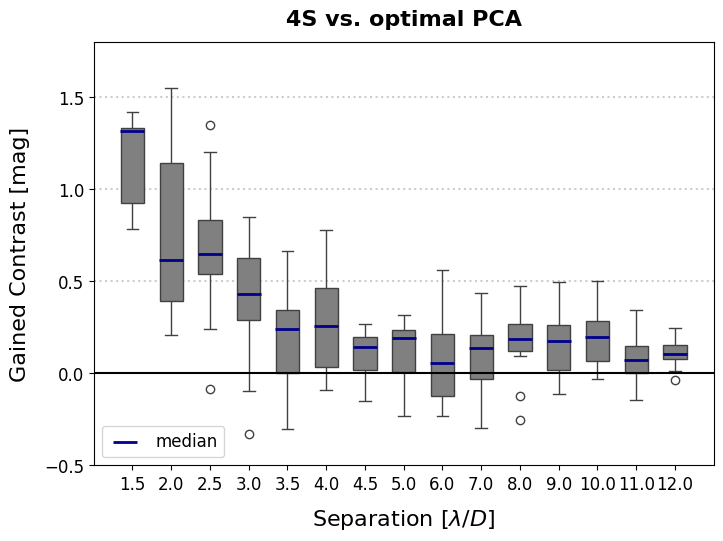

In [13]:
fig, boxes = plt.subplots(1, 1, figsize=(8, 5.5))

sns.boxplot(merged_improvement.T, 
            color="gray",
            width=0.6,
            ax=boxes,
            medianprops={"color": "r", "linewidth": 2, "alpha":0})

boxes.scatter(
    y=median_results,
    x=merged_improvement.T.columns,
    color="darkblue",
    marker="_",
    s=300,
    lw=2,
    label="median",
    zorder=10)

boxes.legend(
    fontsize=12,
    loc='lower left')

plt.hlines(0, xmin= -1, xmax=15, color="black")
plt.hlines(0.5, xmin= -1, xmax=15, ls="dotted", alpha=0.2, color="black", zorder=0)
plt.hlines(1.0, xmin= -1, xmax=15, ls="dotted", alpha=0.2, color="black", zorder=0)
plt.hlines(1.5, xmin= -1, xmax=15, ls="dotted", alpha=0.2, color="black", zorder=0)

boxes.tick_params(
    axis='both', which='major', labelsize=12)

boxes.set_xlim(-1, 15)
boxes.set_ylim(-0.5, 1.8)

boxes.set_xlabel("Separation [$\lambda /D$]", 
           size=16, labelpad=10)
boxes.set_ylabel("Gained Contrast [mag]", 
           size=16, labelpad=10)
boxes.set_title("4S vs. optimal PCA", fontsize=16, fontweight="bold", y=1.02)

fig.patch.set_facecolor('white')
plt.savefig("./final_plots/05_relative_improvement.pdf", bbox_inches='tight')